In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
start = '2012-01-01'
end = '2022-12-21'
stock='GOOG'
data = yf.download (stock,start,end)

/tmp/ipython-input-1670404294.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download (stock,start,end)
[*********************100%***********************]  1 of 1 completed


In [ ]:
data.reset_index(inplace = True)

In [ ]:
data


Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.475201,16.543042,16.152336,16.166451,147611217
1,2012-01-04,16.546255,16.595032,16.356598,16.465787,114989399
2,2012-01-05,16.316736,16.439543,16.247905,16.393986,131808205
3,2012-01-06,16.094152,16.341251,16.088457,16.320205,108119746
4,2012-01-09,15.411779,16.019378,15.381325,16.006996,233776981
...,...,...,...,...,...,...
2756,2022-12-14,94.746811,96.645528,93.384911,94.975455,26452900
2757,2022-12-15,90.661095,93.474374,89.895648,92.987272,28298800
2758,2022-12-16,90.323112,91.207853,89.478137,90.661100,48485500


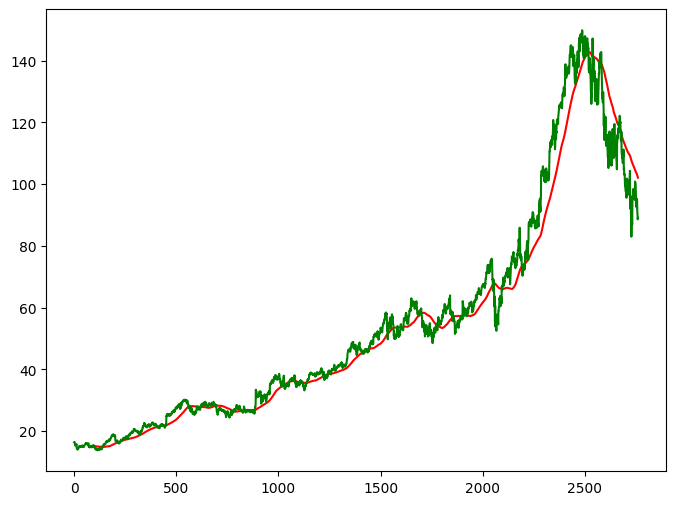

In [ ]:
ma_100_days = data.Close.rolling(100).mean()
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close,'g')
plt.show()

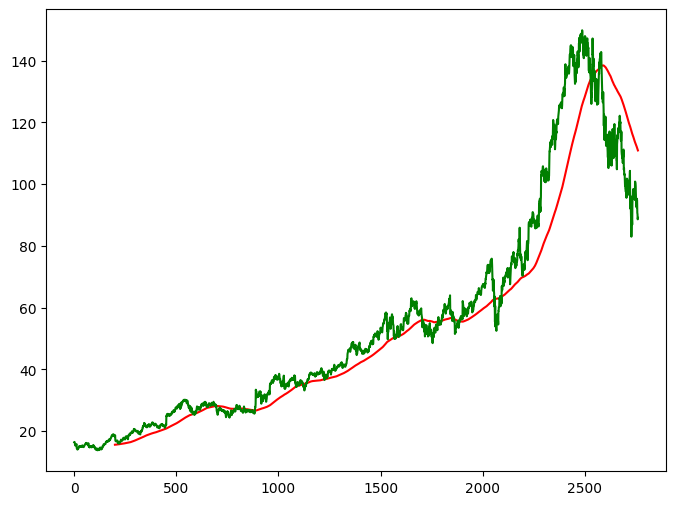

In [ ]:
ma_200_days = data.Close.rolling(200).mean()
plt.figure(figsize=(8,6))
plt.plot(ma_200_days, 'r')
plt.plot(data.Close,'g')
plt.show()

In [ ]:
data.dropna(inplace=True)

In [ ]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [ ]:
data_train.shape[0] , data_test.shape[0]

(2208, 553)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data_train_scale= scaler.fit_transform(data_train)
10 ,11,12,15,16,17,18,19,20,17,18,19


(10, 11, 12, 15, 16, 17, 18, 19, 20, 17, 18, 19)

In [ ]:
x=[]
y=[]
for i in range (100 , data_train_scale.shape[0]):
  x.append(data_train_scale[i-100:i])
  y.append(data_train_scale[i,0])


In [ ]:
x , y = np.array(x), np.array(y)

In [ ]:
from keras.layers import Dense, Dropout , LSTM
from keras.models import Sequential


In [ ]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(data_train_scale.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer = 'adam' , loss = 'mean_squared_error')
model.fit(x,y, epochs = 50 , batch_size = 32 , verbose = 1)


Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 24s 257ms/step - loss: 0.0716
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 21s 270ms/step - loss: 0.0076
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 19s 256ms/step - loss: 0.0057
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 20s 254ms/step - loss: 0.0054
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 16s 249ms/step - loss: 0.0060
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 20s 249ms/step - loss: 0.0048
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 22s 270ms/step - loss: 0.0041
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 16s 250ms/step - loss: 0.0040
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 18s 273ms/step - loss: 0.0043
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 19s 249ms/step - loss: 0.0044
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 17s 250ms/step - loss: 0.0037
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 18s 268ms/step - loss: 0.0037
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 17s 250ms/step - loss: 0.0041
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 22s 274ms/step - loss: 0.0036
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 19s 

In [ ]:
model.summary()

In [ ]:
pas_100_days =data_train.tail(100)
data_test = pd.concat ([pas_100_days , data_test] , ignore_index = True)
data_test_scale = scaler.fit_transform(data_test)


In [ ]:
x=[]
y=[]
for i in range (100 , data_test_scale.shape[0]):
  x.append(data_test_scale[i-100:i])
  y.append(data_test_scale[i,0])
x , y = np.array(x), np.array(y)

In [ ]:
y_predict = model.predict(x)

In [ ]:
y_predict

In [ ]:
scale = 1/scaler.scale_
y_predict = y_predict*scale
y= y*scale
plt.figure(figsize = (10,8))
plt.plot (y_predict , 'r' , label ='predicted Price')
plt.plot (y , 'g' , label ='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
model.save('Stock Prediciton Model.keras')

In [ ]:
model.save("C:/Users/SIDDHI/stock/model.h5")